<a href="https://colab.research.google.com/github/anish-t/Intro_to_ML/blob/main/002200_decision_tree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,f1_score
from sklearn import tree

In [15]:
balance_data = pd.read_csv('/content/Decision_Tree_ Dataset.csv',sep= ',', header= 0)

In [16]:
print ("Dataset Length:: ", len(balance_data))
print ("Dataset Shape:: ", balance_data.shape)

Dataset Length::  1000
Dataset Shape::  (1000, 5)


In [17]:
print ("Dataset:: ")
balance_data.head()

Dataset:: 


,Result,Initial payment,Last payment,Credit Score,House Number
0,yes,201,10018,250,3046
1,yes,205,10016,395,3044
2,yes,257,10129,109,3251
3,yes,246,10064,324,3137
4,yes,117,10115,496,3094


In [18]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
print(X.shape, X_train.shape, X_test.shape)

(1000, 4) (700, 4) (300, 4)


In [73]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [74]:
y_pred = clf_entropy.predict(X_test)
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

In [75]:
# Accuracy
acc_scr=accuracy_score(y_test,y_pred)*100
print ("Accuracy is ", acc_scr)

Accuracy is  93.66666666666667


In [76]:
# F1 Score
labels_curr=['No', 'yes']
f1_scr=f1_score(y_test,y_pred,labels=labels_curr,average='weighted')
print('f1_score is ', f1_scr)

f1_score is  0.9366025091560819


In [84]:
balance_data.columns.values[1:]

array(['Initial payment', 'Last payment', 'Credit Score', 'House Number'],
      dtype=object)

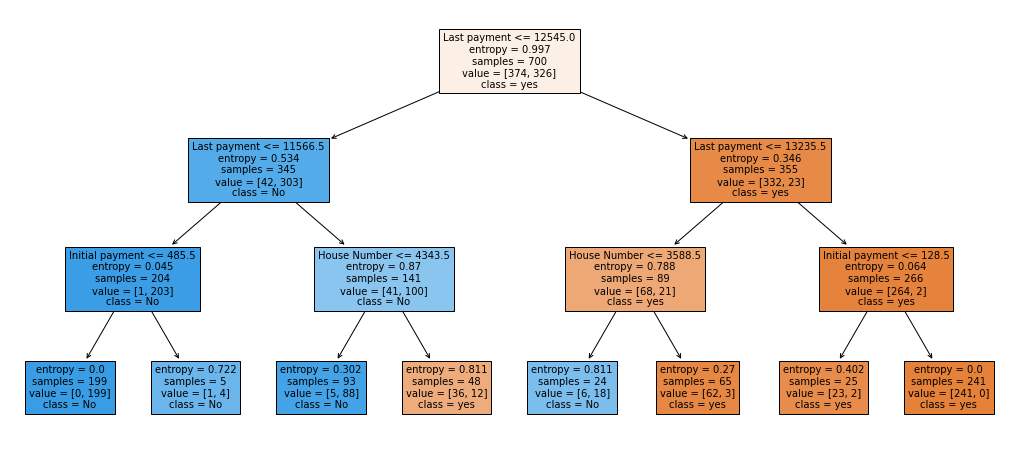

In [88]:
# plot the tree
plt.figure('Descion Tree',figsize=[18,8])
plot_tree(clf_entropy,fontsize=10,filled=True,feature_names=balance_data.columns.values[1:],class_names=['yes','No'])
plt.show()